<a href="https://colab.research.google.com/github/TanviKhare/LGMVIP--DataScience/blob/main/TaskB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

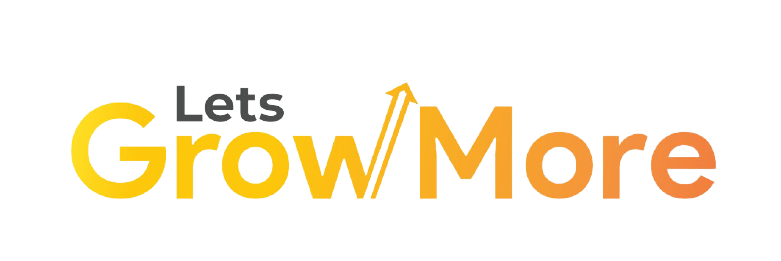

Name : Tanvi Khare

Domain:  Data Science

Task Level:  Beginner

Task Number : 1

1) Iris Flowers Classification ML Project :

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris 

Import Libraries

In [5]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

Load and Explore the data

In [6]:
# Load the iris dataset

data = pd.read_csv('/content/drive/MyDrive/LGM-VIP/Iris.csv')

# See the first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data. drop('Id', axis=1, inplace=True) 

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Data visualisation

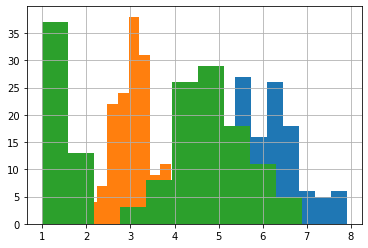

In [13]:
for column in data.columns[0:3]:
    data[column].hist()

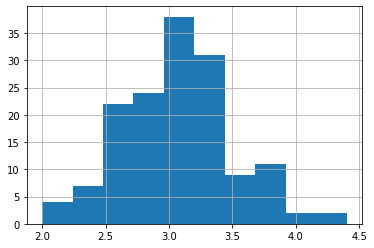

In [14]:
data['SepalWidthCm'].hist()

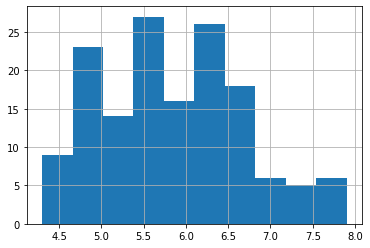

In [15]:
data['SepalLengthCm'].hist()

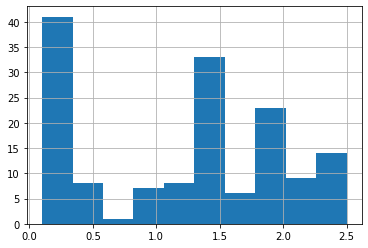

In [16]:
data['PetalWidthCm'].hist()

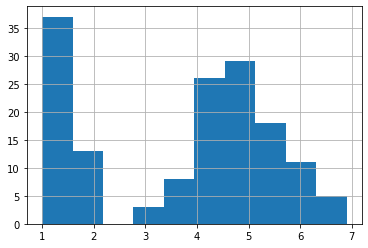

In [17]:
data['PetalLengthCm'].hist()

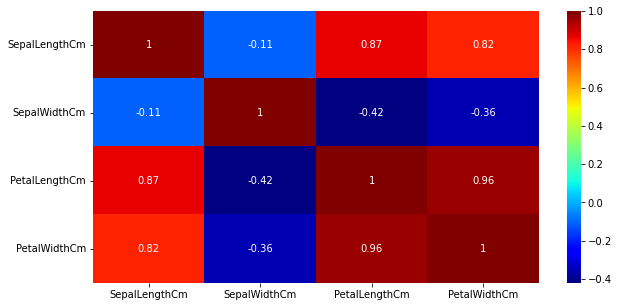

In [18]:
#heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True,cmap = 'jet')
plt.show()

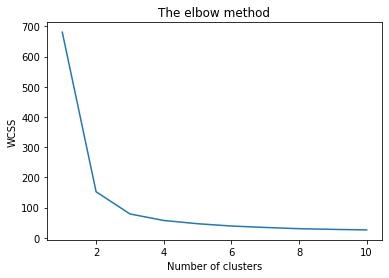

In [20]:
from sklearn.cluster import KMeans
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

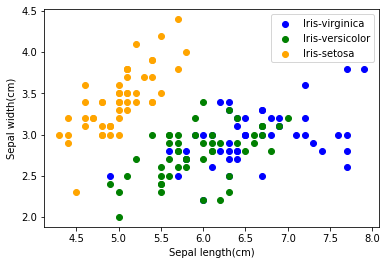

In [21]:
#scatterplot

color = ['blue','green','orange']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = color[i],label = species[i])
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.legend()


Model Training

In [22]:
x = data.drop(['Species'], axis=1)
y = data['Species']
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

(150, 4)
(150,)


In [23]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


Accuracy Evaluation

In [24]:
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [25]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

